In [1]:
import pandas as pd
import numpy as np
from model_gen.data_generator import gen_experiment_data
from special_pca.heter_factor import calc_M_matrix, pca_eigenvalue_ratio
from special_pca.pca_algo import special_pca
from scipy.linalg import subspace_angles

In [2]:
def metric(A,B):
    G_A = A @ A.T
    G_B = B @ B.T
    return  np.linalg.norm(G_A - G_B, 'fro')

# def metric(A,B):
#     angles=subspace_angles(A,B)
#     return  angles.max()

In [3]:
def gen_angles_result(strong_f_num, p_dim, total_f_num, sample_size, num_rep):
    old_esti_k_from_1_real_r = []
    old_esti_k_from_0_real_r = []
    new_esti_k_from_1_real_r = []
    new_esti_k_from_0_real_r = []

    old_esti_k_from_1_esti_r = []
    old_esti_k_from_0_esti_r = []
    new_esti_k_from_1_esti_r = []
    new_esti_k_from_0_esti_r = []
    for i in range(num_rep):
        ################# Gen Data
        print('finished:', i)
        data=gen_experiment_data( sample_size, strong_f_num, p_dim, total_f_num,random_seed=i)
        # Obtain Ture A
        true_A=data['A_orthogonal']

        ################# Calc M matrix and obtain old estimation

        ## k from 1 experiment
        M_matrix=calc_M_matrix(data['y_process'], 1,1)
        M = M_matrix['M'].copy()
        pca_result=pca_eigenvalue_ratio(M)
        #### real r
        # old esti
        old_estimation=pca_result['eigenvectors'].iloc[:,:total_f_num].to_numpy()
        old_esti_k_from_1_real_r.append(metric(true_A, old_estimation))

        # new esti
        new_estimation=special_pca(M_matrix['M'],total_f_num)
        new_esti_k_from_1_real_r.append(metric(true_A, new_estimation))

        #### estimated r
        # estimate r
        estiamted_f_num = pca_result['min_ratio_index']
        # old esti
        old_estimation=pca_result['eigenvectors'].iloc[:,:estiamted_f_num].to_numpy()
        old_esti_k_from_1_esti_r.append(metric(true_A, old_estimation))
        # new esti
        new_estimation=special_pca(M_matrix['M'],estiamted_f_num)
        new_esti_k_from_1_esti_r.append(metric(true_A, new_estimation))



        ## k from 0 experiment
        M_matrix=calc_M_matrix(data['y_process'], 0,1)
        M = M_matrix['M'].copy()
        pca_result=pca_eigenvalue_ratio(M)
        #### real r
        # old esti
        old_estimation=pca_result['eigenvectors'].iloc[:,:total_f_num].to_numpy()
        old_esti_k_from_0_real_r.append(metric(true_A, old_estimation))
        
        # eigenvalues, eigenvectors = np.linalg.eig(M)
        # # Get the indices of the top 3 largest eigenvalues
        # top_3_indices = np.argsort(eigenvalues)[-3:][::-1]
        # # Extract the corresponding eigenvectors
        # top_3_eigenvectors = eigenvectors[:, top_3_indices]
        # print(metric(true_A, top_3_eigenvectors))       
        
        # new esti
        new_estimation=special_pca(M_matrix['M'],total_f_num)
        new_esti_k_from_0_real_r.append(metric(true_A, new_estimation))

        #### estimated r
        # estimate r
        estiamted_f_num = pca_result['min_ratio_index']
        # old esti
        old_estimation=pca_result['eigenvectors'].iloc[:,:estiamted_f_num].to_numpy()
        old_esti_k_from_0_esti_r.append(metric(true_A, old_estimation))
        # new esti
        new_estimation=special_pca(M_matrix['M'],estiamted_f_num)
        new_esti_k_from_0_esti_r.append(metric(true_A, new_estimation))


    result = {
        'old_esti_k_from_1_real_r' : old_esti_k_from_1_real_r,
        'old_esti_k_from_0_real_r' : old_esti_k_from_0_real_r,
        'new_esti_k_from_1_real_r' : new_esti_k_from_1_real_r,
        'new_esti_k_from_0_real_r' : new_esti_k_from_0_real_r,

        'old_esti_k_from_1_esti_r' : old_esti_k_from_1_esti_r,
        'old_esti_k_from_0_esti_r' : old_esti_k_from_0_esti_r,
        'new_esti_k_from_1_esti_r' : new_esti_k_from_1_esti_r,
        'new_esti_k_from_0_esti_r' : new_esti_k_from_0_esti_r
    }
    df = pd.DataFrame(result)
    return df

In [4]:
small_result = {'mean': pd.DataFrame()}
################# Setting
for strong_f_num in range(4):
    print('strong_f_num:', strong_f_num)
    
    p_dim = 40
    total_f_num = 3
    sample_size = 200
    num_rep = 200

    df = gen_angles_result(strong_f_num, p_dim, total_f_num, sample_size, num_rep)

    small_result['mean'] = pd.concat([small_result['mean'], df.mean().rename(f's={strong_f_num}')], axis=1)

    small_result[strong_f_num] = df


strong_f_num: 0
finished: 0
finished: 1
finished: 2
finished: 3
finished: 4
finished: 5
finished: 6
finished: 7
finished: 8
finished: 9
finished: 10
finished: 11
finished: 12
finished: 13
finished: 14
finished: 15
finished: 16
finished: 17
finished: 18
finished: 19
finished: 20
finished: 21
finished: 22
finished: 23
finished: 24
finished: 25
finished: 26
finished: 27
finished: 28
finished: 29
finished: 30
finished: 31
finished: 32
finished: 33
finished: 34
finished: 35
finished: 36
finished: 37
finished: 38
finished: 39
finished: 40
finished: 41
finished: 42
finished: 43
finished: 44
finished: 45
finished: 46
finished: 47
finished: 48
finished: 49
finished: 50
finished: 51
finished: 52
finished: 53
finished: 54
finished: 55
finished: 56
finished: 57
finished: 58
finished: 59
finished: 60
finished: 61
finished: 62
finished: 63
finished: 64
finished: 65
finished: 66
finished: 67
finished: 68
finished: 69
finished: 70
finished: 71
finished: 72
finished: 73
finished: 74
finished: 75
finish

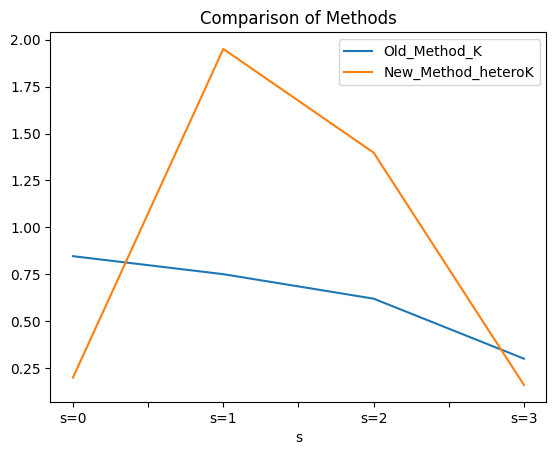

In [8]:
import matplotlib.pyplot as plt
result_pic = small_result['mean'].T.reset_index()
result_pic = result_pic.rename(columns={'old_esti_k_from_1_real_r': 'Old_Method_K', 
                                        'old_esti_k_from_0_real_r': 'Old_Method_heteroK',  
                                        'new_esti_k_from_0_real_r': 'New_Method_heteroK'})

ax = result_pic.plot(x='index', y=['Old_Method_K','New_Method_heteroK'])

ax.set_xlabel('s') 
ax.set_title('Comparison of Methods')

plt.show()

In [6]:
result = {'mean': pd.DataFrame()}
################# Setting
for strong_f_num in range(7):
    print('strong_f_num:', strong_f_num)
    
    p_dim = 80
    total_f_num = 6
    sample_size = 400
    num_rep = 200

    df = gen_angles_result(strong_f_num, p_dim, total_f_num, sample_size, num_rep)

    result['mean'] = pd.concat([result['mean'], df.mean().rename(f's={strong_f_num}')], axis=1)

    result[strong_f_num] = df

strong_f_num: 0
finished: 0
finished: 1
finished: 2
finished: 3
finished: 4
finished: 5
finished: 6
finished: 7
finished: 8
finished: 9
finished: 10
finished: 11
finished: 12
finished: 13
finished: 14
finished: 15
finished: 16
finished: 17
finished: 18
finished: 19
finished: 20
finished: 21
finished: 22
finished: 23
finished: 24
finished: 25
finished: 26
finished: 27
finished: 28
finished: 29
finished: 30
finished: 31
finished: 32
finished: 33
finished: 34
finished: 35
finished: 36
finished: 37
finished: 38
finished: 39
finished: 40
finished: 41
finished: 42
finished: 43
finished: 44
finished: 45
finished: 46
finished: 47
finished: 48
finished: 49
finished: 50
finished: 51
finished: 52
finished: 53
finished: 54
finished: 55
finished: 56
finished: 57
finished: 58
finished: 59
finished: 60
finished: 61
finished: 62
finished: 63
finished: 64
finished: 65
finished: 66
finished: 67
finished: 68
finished: 69
finished: 70
finished: 71
finished: 72
finished: 73
finished: 74
finished: 75
finish

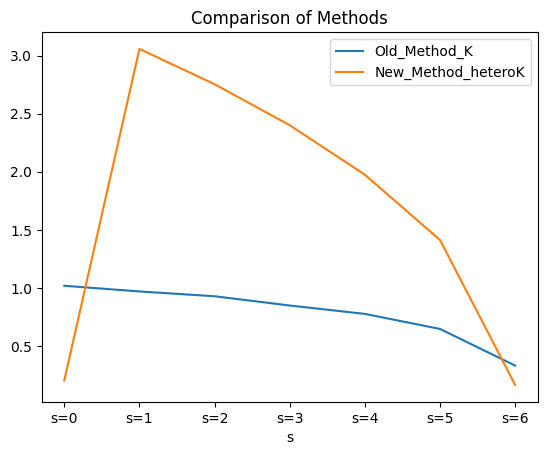

In [9]:
import matplotlib.pyplot as plt

result_pic = result['mean'].T.reset_index()
result_pic = result_pic.rename(columns={'old_esti_k_from_1_real_r': 'Old_Method_K', 
                                        'old_esti_k_from_0_real_r': 'Old_Method_heteroK',  
                                        'new_esti_k_from_0_real_r': 'New_Method_heteroK'})

ax = result_pic.plot(x='index', y=['Old_Method_K', 'New_Method_heteroK'])


ax.set_xlabel('s') 
ax.set_title('Comparison of Methods')

plt.show()